## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [1]:
%tensorflow_version 2.x

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


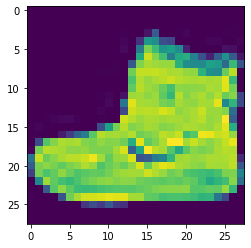

Label:  9


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


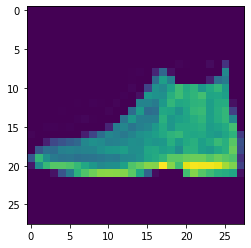

Label:  9


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### Data Pre-processing

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [10]:
model = Sequential()

In [11]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [12]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
300/300 [==============================] - 5s 5ms/step - loss: 2.3093 - accuracy: 0.1066
Epoch 2/100
300/300 [==============================] - 1s 5ms/step - loss: 2.2982 - accuracy: 0.1623
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 2.2959 - accuracy: 0.1679
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 2.2937 - accuracy: 0.2140
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 2.2907 - accuracy: 0.2069
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2873 - accuracy: 0.2657
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2828 - accuracy: 0.2808
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2777 - accuracy: 0.3254
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2721 - accuracy: 0.3639
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2648 - accura

In [14]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7254 - accuracy: 0.7638


In [15]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7638000249862671


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [16]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [17]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


300/300 [==============================] - 1s 3ms/step - loss: 2.3867 - accuracy: 0.1096
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3386 - accuracy: 0.1172
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3156 - accuracy: 0.1285
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3043 - accuracy: 0.1221
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2985 - accuracy: 0.1449
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2952 - accuracy: 0.1746
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2931 - accuracy: 0.2010
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2916 - accuracy: 0.2520
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2903 - accuracy: 0.2573
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2892 - accuracy: 0.2941
E

In [18]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0686 - accuracy: 0.4079


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.40790000557899475


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [20]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.9766 - accuracy: 0.7057
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5850 - accuracy: 0.7910
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5207 - accuracy: 0.8123
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4841 - accuracy: 0.8250
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4597 - accuracy: 0.8332
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8379
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4291 - accuracy: 0.8441
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4173 - accuracy: 0.8492
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4077 - accuracy: 0.8529
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3995 - accurac

In [22]:
results = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.4745 - accuracy: 0.8268


In [23]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8267999887466431


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [24]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [25]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 8s 4ms/step - loss: 1.3590 - accuracy: 0.5905
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8479 - accuracy: 0.7397
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7169 - accuracy: 0.7679
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6477 - accuracy: 0.7849
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6066 - accuracy: 0.7967
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5730 - accuracy: 0.8077
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5494 - accuracy: 0.8145
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5278 - accuracy: 0.8190
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5110 - accuracy: 0.8242
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5001 - accurac

In [27]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8596


In [28]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8596000075340271


### Dropout

In [29]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [30]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 9s 4ms/step - loss: 0.8613 - accuracy: 0.7046
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6037 - accuracy: 0.7973
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5446 - accuracy: 0.8153
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5206 - accuracy: 0.8236
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5036 - accuracy: 0.8282
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4810 - accuracy: 0.8340
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4627 - accuracy: 0.8399
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4552 - accuracy: 0.8447
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4486 - accuracy: 0.8470
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4420 - accurac

In [31]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.8620


In [32]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8619999885559082
